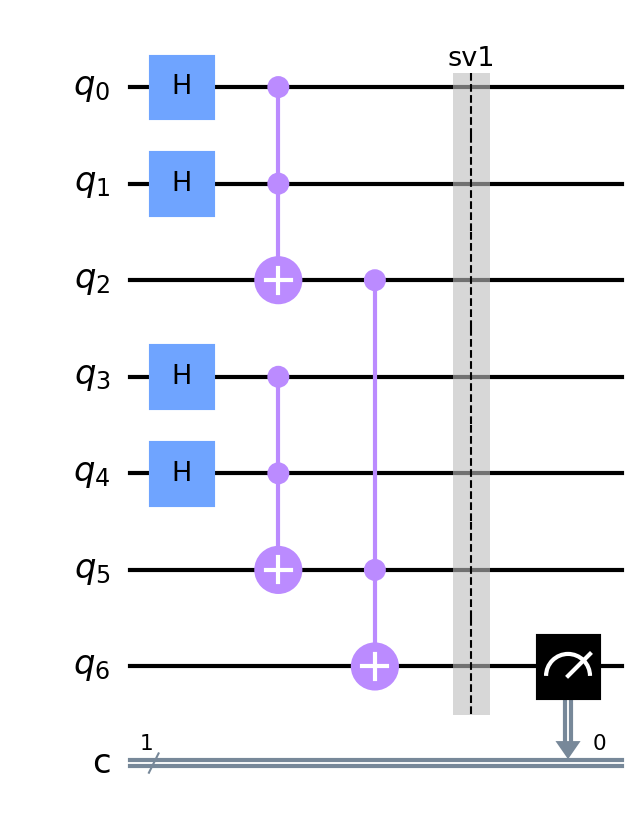

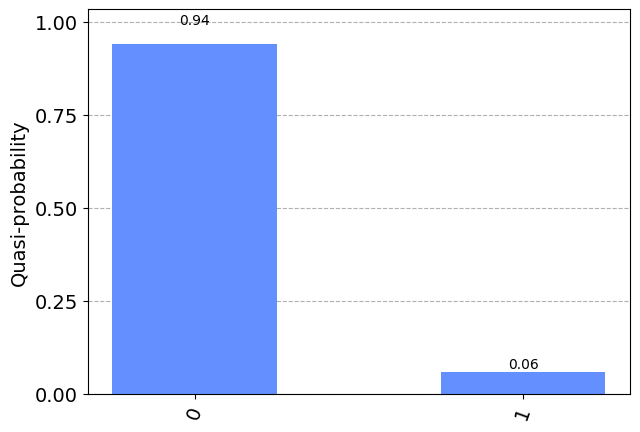

In [16]:
"""quantum_circuit2.ipynb"""
# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

from __future__ import annotations

import typing

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

backend: Any = Aer.get_backend("aer_simulator")
qc: Any = QuantumCircuit(7,1)

# TODO: Implement your circuit here
qc.h(0)
qc.h(1)
qc.ccx(0,1,2)
qc.h(3)
qc.h(4)
qc.ccx(3,4,5)
qc.ccx(2,5,6)
qc.save_statevector("sv1")
qc.measure(6,0)

result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()
display(qc.draw(output="mpl", scale=1.5))
display(plot_distribution(counts))  # type: ignore

The above circuit can be broken into three major gates, two of which are identical and composed of the $G = CC_{\text{not}} H^{\otimes 2} \otimes I$. while the tofoli gate is by itself. In both cases gate $G$ acts on three qbits and for the sake of our argument we shall take the first two qbits as ancilla bits. The outcome of gate $G$ on a state $| 0 0 0 \rangle$ is as follows
\begin{align}
    G | 0 0 0 \rangle &= CC_{\text{not}} H^{\otimes 2} \otimes I | 0 0 0 \rangle \\
    & = \bigwedge_2 X \frac{1}{2} ( | 0 0 0 \rangle + | 1 0 0 \rangle + | 0 1 0 \rangle + | 1 1 0 \rangle) \\
    & = \frac{1}{2} (  \bigwedge_2 X | 0 0 0 \rangle +  \bigwedge_2 X | 1 0 0 \rangle +  \bigwedge_2 X | 0 1 0 \rangle +  \bigwedge_2 X | 1 1 0 
    \rangle) \\
    & = \frac{1}{2} ( | 0 0 0 \rangle + | 1 0 0 \rangle + | 0 1 0 \rangle + | 1 1 1 \rangle) 
\end{align}
Remember that we are treating the first two qbits as ancilla bits, so in reality what the $G$ gate did was generate three states where the thirs qbit is 0 and one state where the third qbit is. Given the equal probability if we meassured the third qbit repeatedly we would deduce
\begin{align}
    G | \text{third qbit} \rangle & = \frac{\sqrt{3}}{2} | 0 \rangle + \frac{1}{2} | 1 \rangle 
\end{align}
The reason we only care about the third qbit is that when moving to the third major gate the only information being accessed is the third qbit of the $G$ gates. Lets craft the effective state before the $CC_{\text{not}}$
\begin{align}
    | \text{effective state before $CC_{\text{not}}$} \rangle & = \left(\frac{\sqrt{3}}{2} | 0 \rangle + \frac{1}{2} | 1 \rangle \right)^{\otimes 2} | 0 \rangle \\
    & = \frac{3}{4} | 0 0 0 \rangle + \frac{\sqrt{3}}{4} | 1 0 0 \rangle + \frac{\sqrt{3}}{4} | 0 1 0 \rangle + \frac{1}{2} | 1 1 0 \rangle \\
\end{align}
Finally we act the $CC_{\text{not}}$ 
\begin{align}
    CC_{\text{not}} \frac{3}{4} | 0 0 0 \rangle + \frac{\sqrt{3}}{4} | 1 0 0 \rangle + \frac{\sqrt{3}}{4} | 0 1 0 \rangle + \frac{1}{2} | 1 1 0 \rangle 
    = \frac{3}{4} | 0 0 0 \rangle + \frac{\sqrt{3}}{4} | 1 0 0 \rangle + \frac{\sqrt{3}}{4} | 0 1 0 \rangle + \frac{1}{2} | 1 1 1 \rangle  
\end{align}
We are presented on three possible outcomes, three of which have a the last qbit as 0 and one where the final qbit is 1.
\begin{align}
    \frac{3}{4} | 0 0 0 \rangle \rightarrow \frac{9}{16} \text{ prob of } q_6 = 0\\
    \frac{\sqrt{3}}{4} | 1 0 0 \rangle \rightarrow \frac{3}{16} \text{ prob of } q_6 = 0 \\
    \frac{\sqrt{3}}{4} | 0 1 0 \rangle \rightarrow \frac{3}{16} \text{ prob of } q_6 = 0 \\
    \frac{1}{2} | 1 1 1 \rangle  \rightarrow \frac{1}{16} \text{ prob of } q_6 = 1
\end{align}
When grouping up similar events we have that obtaining $q_6 = 0$ is $94 \%$ likely while obtaining $q_6 = 1$ is $6 \%$, which is what we see in our histogram.    
**additional comments**  
This circuit and the results of the first two major gates is very reminisent of the triplete and singlet states.